# Matplotlib
> `import matplotlib.pyplot as plt`

<AxesSubplot:ylabel='Frequency'>

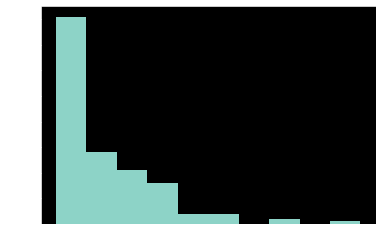

In [1]:
import plotly
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# --- Load the data ---
data = pd.read_csv('https://raw.githubusercontent.com/FBosler/AdvancedPlotting/master/combined_set.csv')


# --- This assigns labels per year ---
data['Mean Log GDP per capita']  = data.groupby('Year')['Log GDP per capita'].transform(
    pd.qcut,
    q=5,
    labels=(['Lowest','Low','Medium','High','Highest'])
)


# --- Create a plot ---
np.exp(data[data['Year']==2018]['Log GDP per capita']).plot(
    kind='hist'
)

There are `five` main parameters that I use when plotting with Pandas:
- `kind`: Pandas has to know what kind of plot you want to create, the following options are available hist, bar, barh, scatter, area, kde, line, box,       hexbin, pie.
- `figsize`: Allows overwriting the default output size of 6 inches wide and 4 inches high. figsize expects a tuple (e.g., figsize=(12,8) which I often use)
- `title`: Adds a title to the chart. Most of the time, I use this to clarify whatever is shown in the chart so that when I come back to it, I quickly can identify what's going on. title expects a string.
- `bins`: Allows overriding the bin width for histograms. bins expects a list or listlike sequence of values (e.g., bins=np.arange(2,8,0.25))
- `xlim/ylim`: Allows overriding the defaults for maximum and minimum values of the axis. Both, xlim and ylim expect a tuple (e.g., xlim=(0,5))

## Vertical bar chart

<AxesSubplot:xlabel='Country name'>

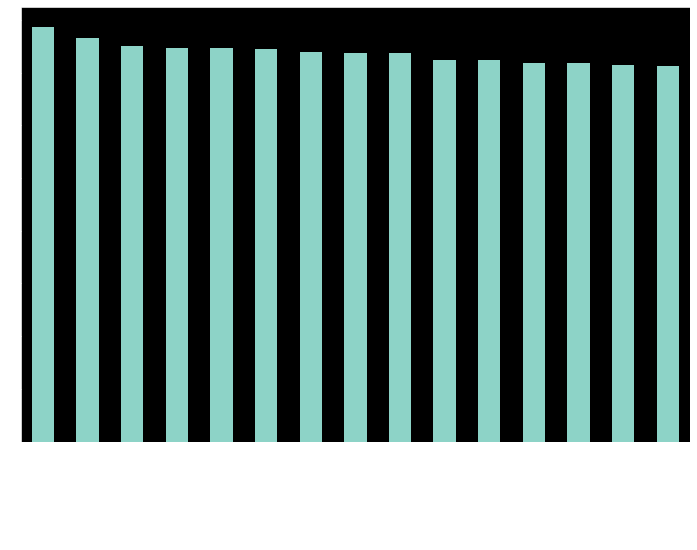

In [2]:
data[
    data['Year'] == 2018
].set_index('Country name')['Life Ladder'].nlargest(15).plot(
    kind='bar',
    figsize=(12,8)
)

> 2018: List of 15 happiest countries is led by Finnland

## Horizontal bar chart

<AxesSubplot:ylabel='Continent'>

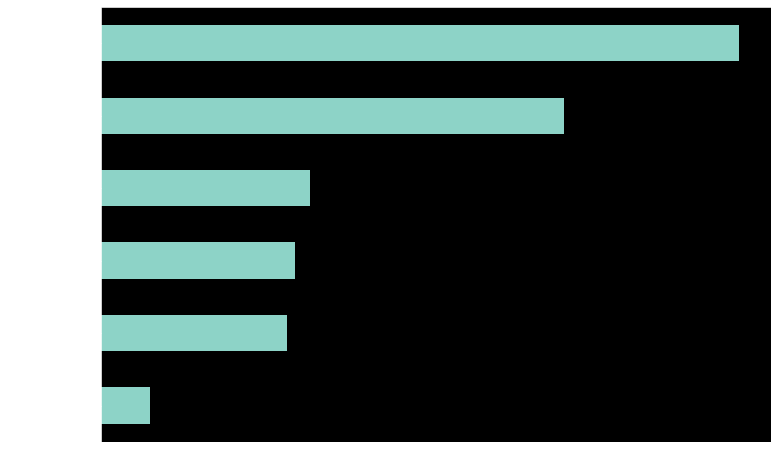

In [3]:
np.exp(data[
    data['Year'] == 2018
].groupby('Continent')['Log GDP per capita']\
       .mean()).sort_values().plot(
    kind='barh',
    figsize=(12,8)
)

> Average GDP per capita by continent in 2011 USD Dollars clearly led by Australia and New Zealand

## Box Plot

<AxesSubplot:>

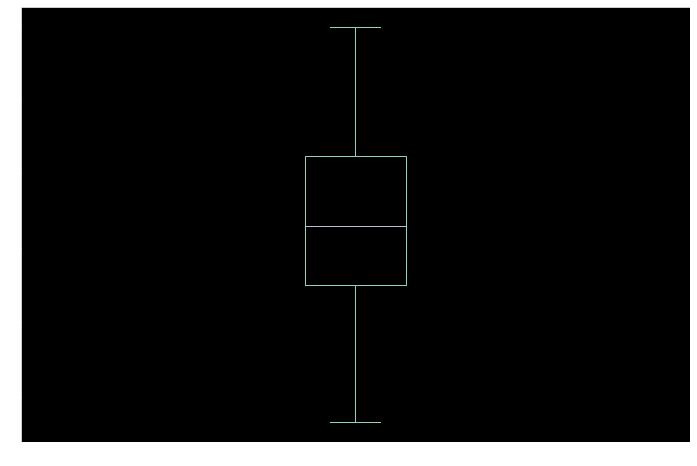

In [4]:
data['Life Ladder'].plot(
    kind='box',
    figsize=(12,8)
)

> Box plot of the distribution of Life Ladder shows that the median is somewhere around 5.5 ranging from values below 3 to up 8.

## Scatter plot


<AxesSubplot:xlabel='Healthy life expectancy at birth', ylabel='Gapminder Life Expectancy'>

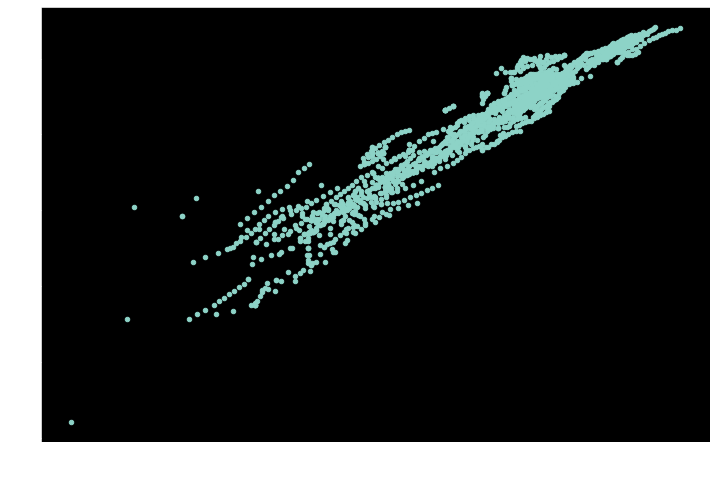

In [5]:
data[['Healthy life expectancy at birth','Gapminder Life Expectancy']].plot(
    kind='scatter',
    x='Healthy life expectancy at birth',
    y='Gapminder Life Expectancy',
    figsize=(12,8)
)

> Scatter plot of the World Happiness Report life expectation against the Gapminder life expectation shows a high correlation between the two (to be expected)

## Hexbin chart

<AxesSubplot:xlabel='Healthy life expectancy at birth', ylabel='Generosity'>

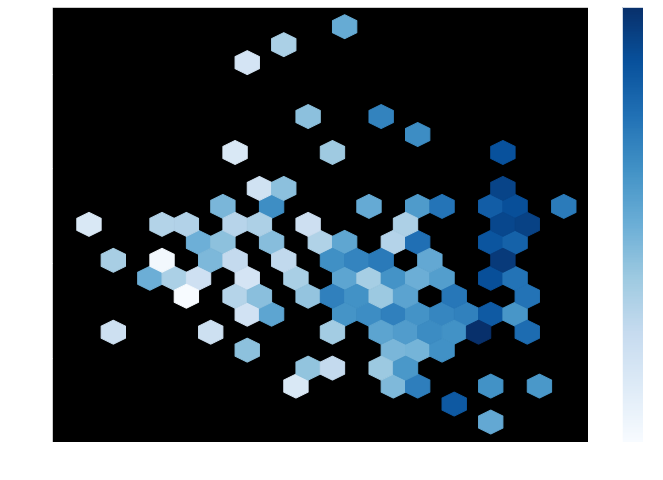

In [6]:
data[data['Year'] == 2018].plot(
    kind='hexbin',
    x='Healthy life expectancy at birth',
    y='Generosity',
    C='Life Ladder',
    gridsize=20,
    figsize=(12,8),
    cmap="Blues", # defaults to greenish
    sharex=False # required to get rid of a bug
)

> 2018: Hexbin plot, plotting life expectancy against generosity. The color of bins indicates the average of life ladder in the respective bin.

## Pie chart

<AxesSubplot:ylabel='Gapminder Population'>

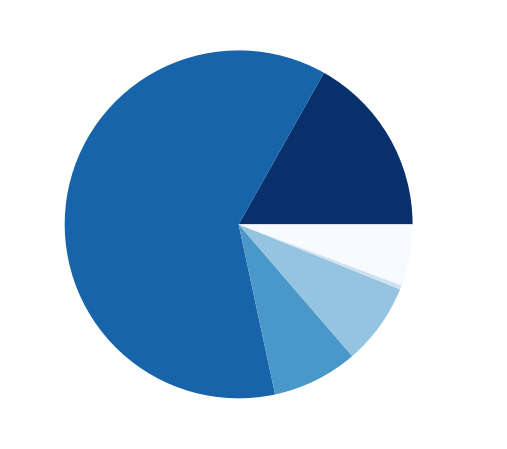

In [7]:
data[data['Year'] == 2018].groupby(
    ['Continent']
)['Gapminder Population'].sum().plot(
    kind='pie',
    figsize=(12,8),
    cmap="Blues_r", # defaults to orangish
)

> 2018: Pie chart showing the total population by continent

## Stacked area chart

<AxesSubplot:xlabel='Year'>

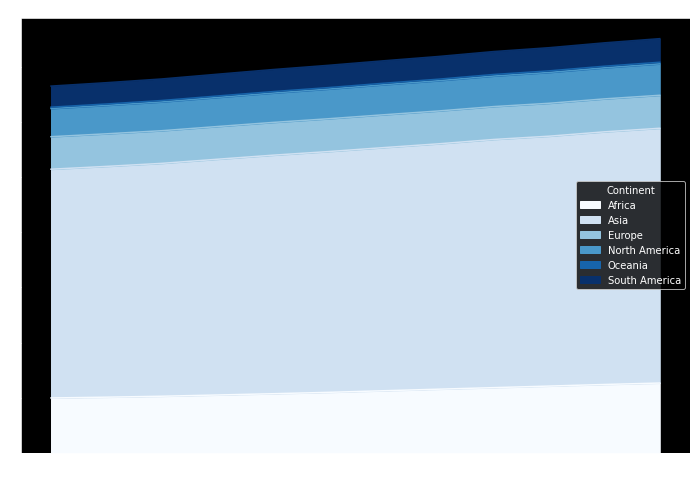

In [8]:
data.groupby(
    ['Year','Continent']
)['Gapminder Population'].sum().unstack().plot(
    kind='area',
    figsize=(12,8),
    cmap="Blues", # defaults to orangish
)

> Population numbers accross the globe are on the rise.

## Line chart

<AxesSubplot:xlabel='Year'>

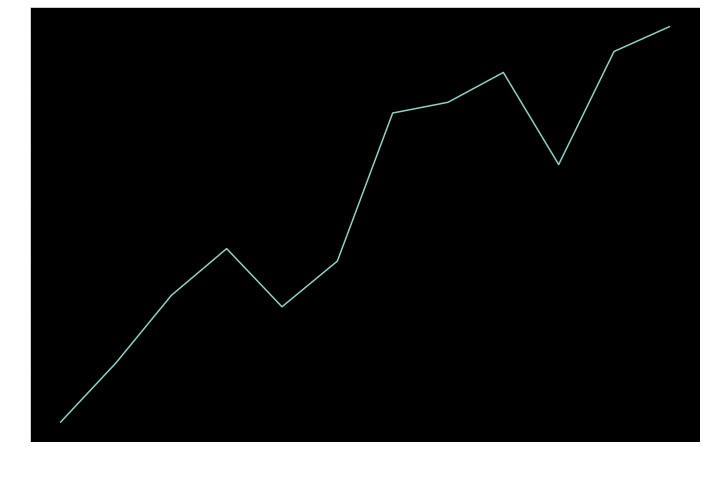

In [9]:
data[
    data['Country name'] == 'Germany'
].set_index('Year')['Life Ladder'].plot(
    kind='line',
    figsize=(12,8)
)

> Line chart depicting the development of happiness in Germany.

## Conclusion on plotting with Pandas
Plotting with pandas is convenient. It is easily accessible, and it is fast. The plots are fairly ugly. Deviating from defaults is borderline impossible, and that is okay because we have other tools for more aesthetically appealing charts. Moving on to seaborn.

---
# Seaborn

> `import seaborn as sns`

Seaborn utilizes plotting defaults. To make sure that your results match mine, run the following commands.

In [10]:
sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(7,5)}, 
    style="white" # nicer layout
)

## Plotting univariate distributions

C:\Users\pjose\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Life Ladder', ylabel='Density'>

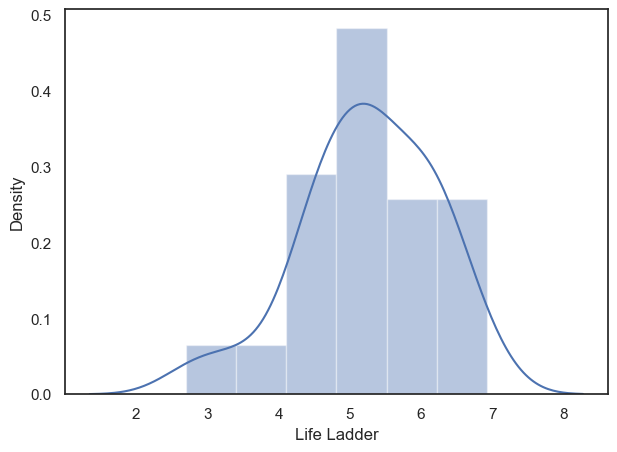

In [11]:
sns_data = data[
    (data['Year'] == 2018) &
    (data ['Continent'] == 'Asia')
]

sns.distplot(
    sns_data['Life Ladder'],
    label = 'Life Ladder'
)

> Histogram and kernel density estimation of “Life Ladder” for Asian countries in 2018

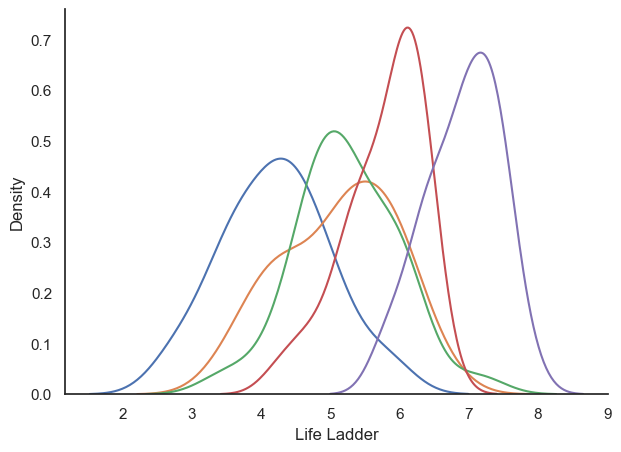

In [12]:
__sns_data = {}
for val in data['Mean Log GDP per capita'].cat.categories:
    __sns_data[val] = data[
        (data['Year'] == 2018) &
        (data['Mean Log GDP per capita'] == val)
    ]

    sns.kdeplot(
        __sns_data[val]['Life Ladder'],
        label = val
    )

sns.despine()

> Kernel density estimation of “Life Ladder” for five buckets of GDP per Capita — Money can buy happiness

## Plotting bivariate distributions

- Whenever I want to explore the relationship between two or multiple variables visually, it typically comes down to some form of scatterplot and an assessment of distributions.
- There are three variations of a conceptually similar plot. In each of those plots, the center graph (scatter, bivariate KDE, and hexbin) helps to understand the joint frequency distribution between two variables

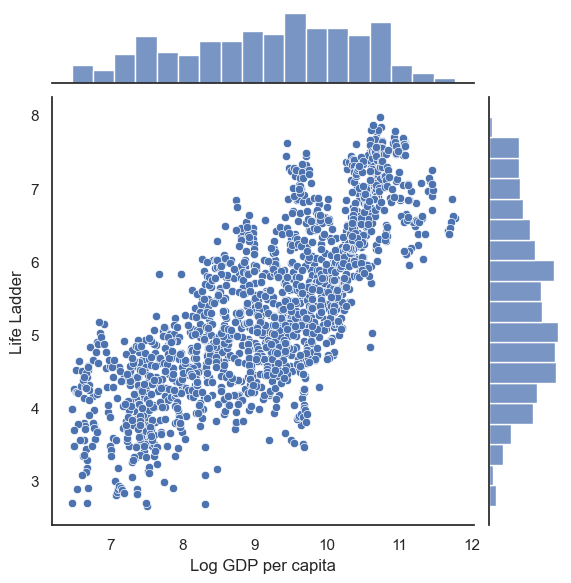

In [13]:
sns.jointplot(
    x='Log GDP per capita',
    y='Life Ladder',
    data=data,
    kind='scatter' # or 'kde' or 'hex'
)

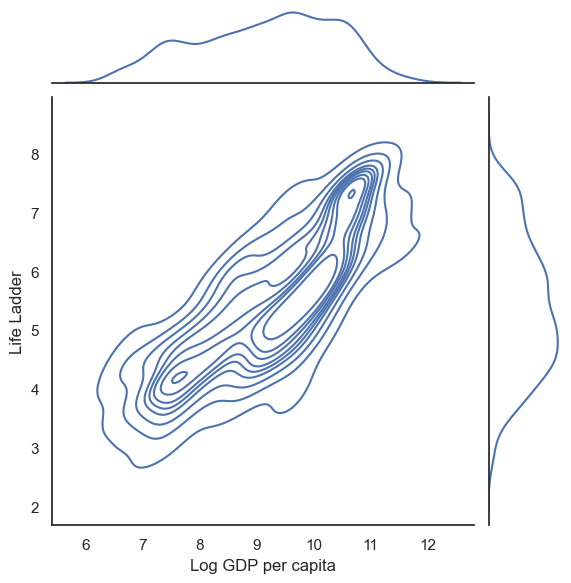

In [14]:
sns.jointplot(
    x='Log GDP per capita',
    y='Life Ladder',
    data=data,
    kind='kde' # or 'kde' or 'hex'
)

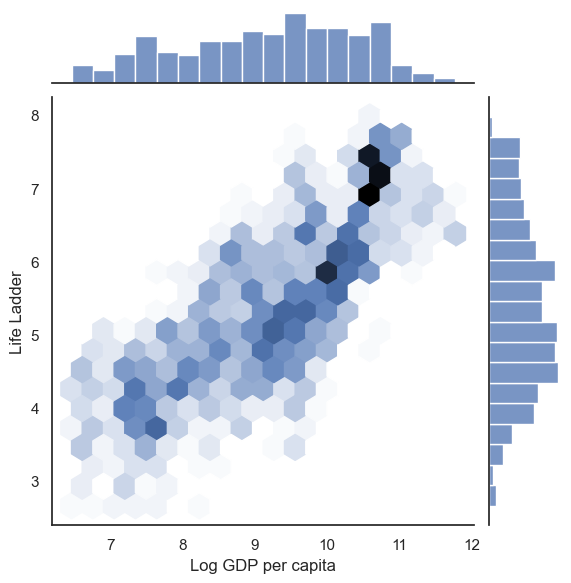

In [15]:
sns.jointplot(
    x='Log GDP per capita',
    y='Life Ladder',
    data=data,
    kind='hex' # or 'kde' or 'hex'
)

## Scatter Plot

A scatterplot is a way of visualizing the joint density distribution of two variables. We can throw a third variable in the mix by adding a hue and a fourth variable by adding the size parameter.

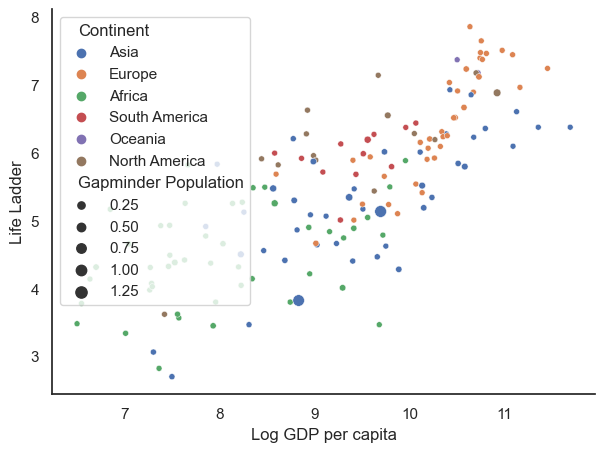

In [16]:
sns.scatterplot(
    x='Log GDP per capita',
    y='Life Ladder',
    data=data[data['Year'] == 2018],    
    hue='Continent',
    size='Gapminder Population'
)
# both, hue and size are optional
sns.despine() # prettier layout

> Log GDP per capita against Life Ladder, colors based on the continent and size on population

## Violin Plot


The violin plot is a combination of a box plot and a kernel density estimate. It plays a similar role as a box plot. It shows the distribution of quantitative data across categorical variables such that those distributions can be compared.

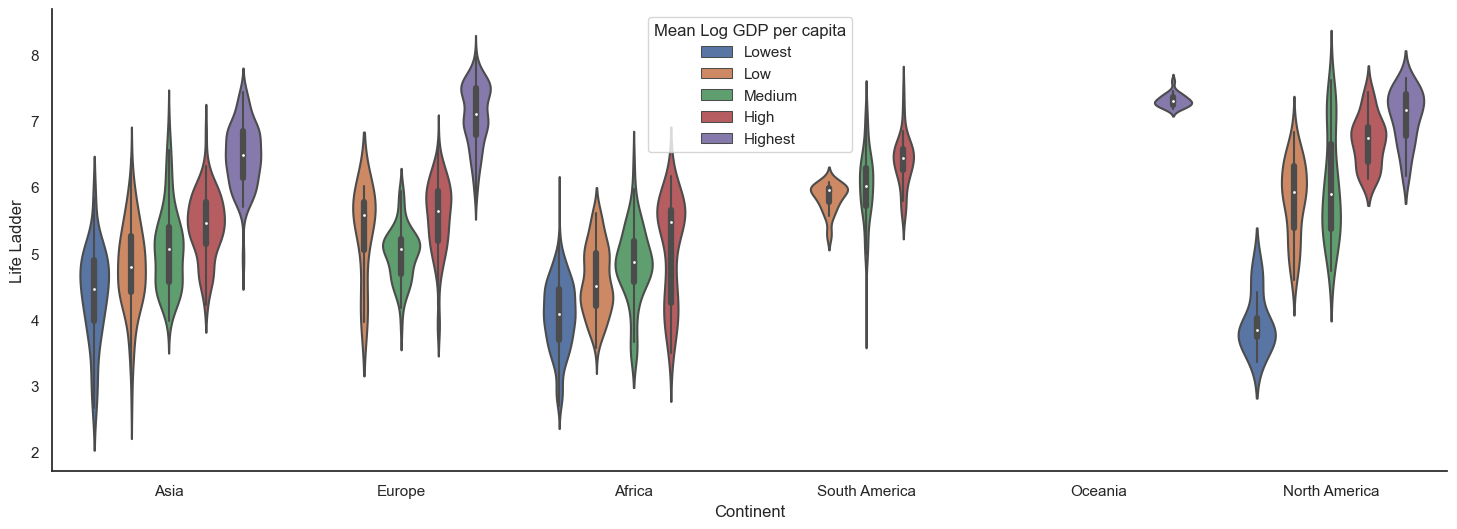

In [17]:
sns.set(
    rc={'figure.figsize':(18,6)}, 
    style="white"
)
sns.violinplot(
    x='Continent',
    y='Life Ladder',
    hue='Mean Log GDP per capita',
    data=data
)
sns.despine()

> Violin plot where we plot continents against Life Ladder, we use the Mean Log GDP per capita to group the data. It looks like a higher GDP per capita makes for higher happiness

## Pair Plot


The Seaborn pair plot plots all combinations of two-variable scatter plots in a large grid. I typically feel like this is a bit of information overload, but it can help to spot patterns.

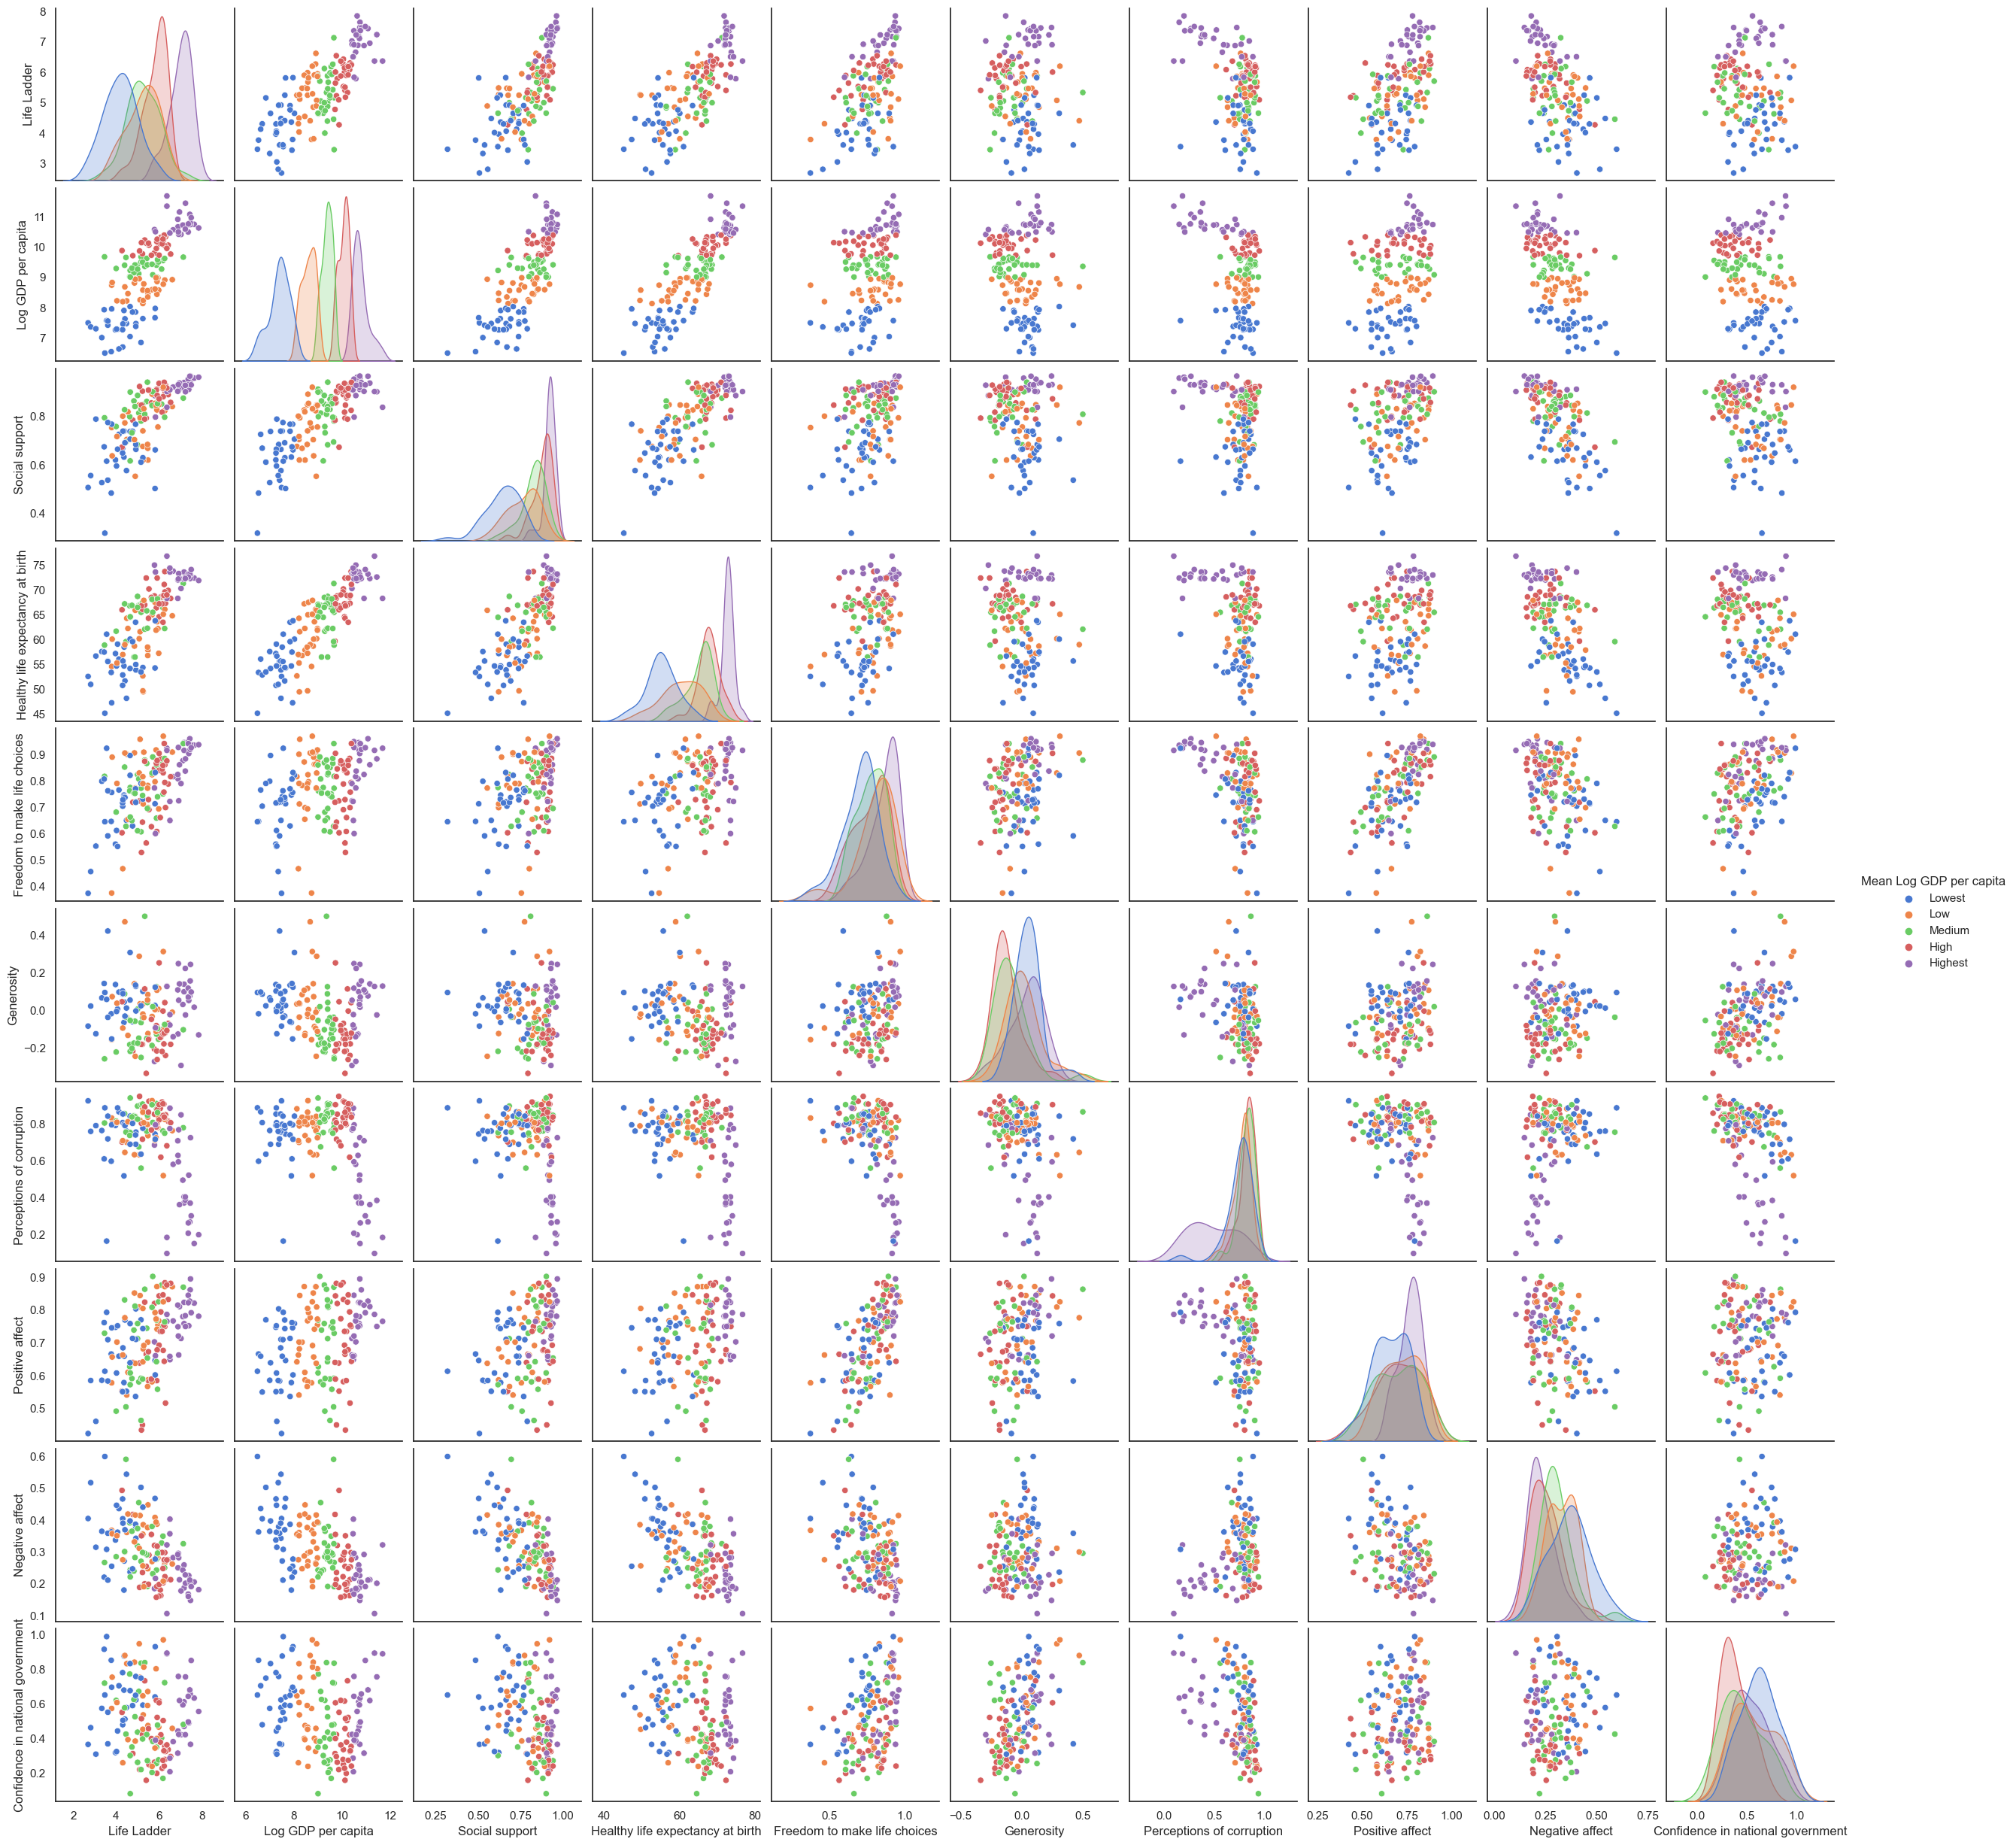

In [18]:
sns.set(
    style="white", 
    palette="muted", 
    color_codes=True
)
sns.pairplot(
    data[data.Year == 2018][[
        'Life Ladder','Log GDP per capita', 
        'Social support','Healthy life expectancy at birth', 
        'Freedom to make life choices','Generosity', 
        'Perceptions of corruption', 'Positive affect',
        'Negative affect','Confidence in national government',
        'Mean Log GDP per capita'
    ]].dropna(), 
    hue='Mean Log GDP per capita'
)

> Seaborn scatterplot grid where all selected variables a scattered against every other variable in the lower and upper part of the grid, the diagonal contains a kde plot.

## Facet Grids

The FacetGrid allows creating multiple charts segmented by variables. 

*For example, the rows could be one variable (category of GDP per capita) and the columns another one (continents).*

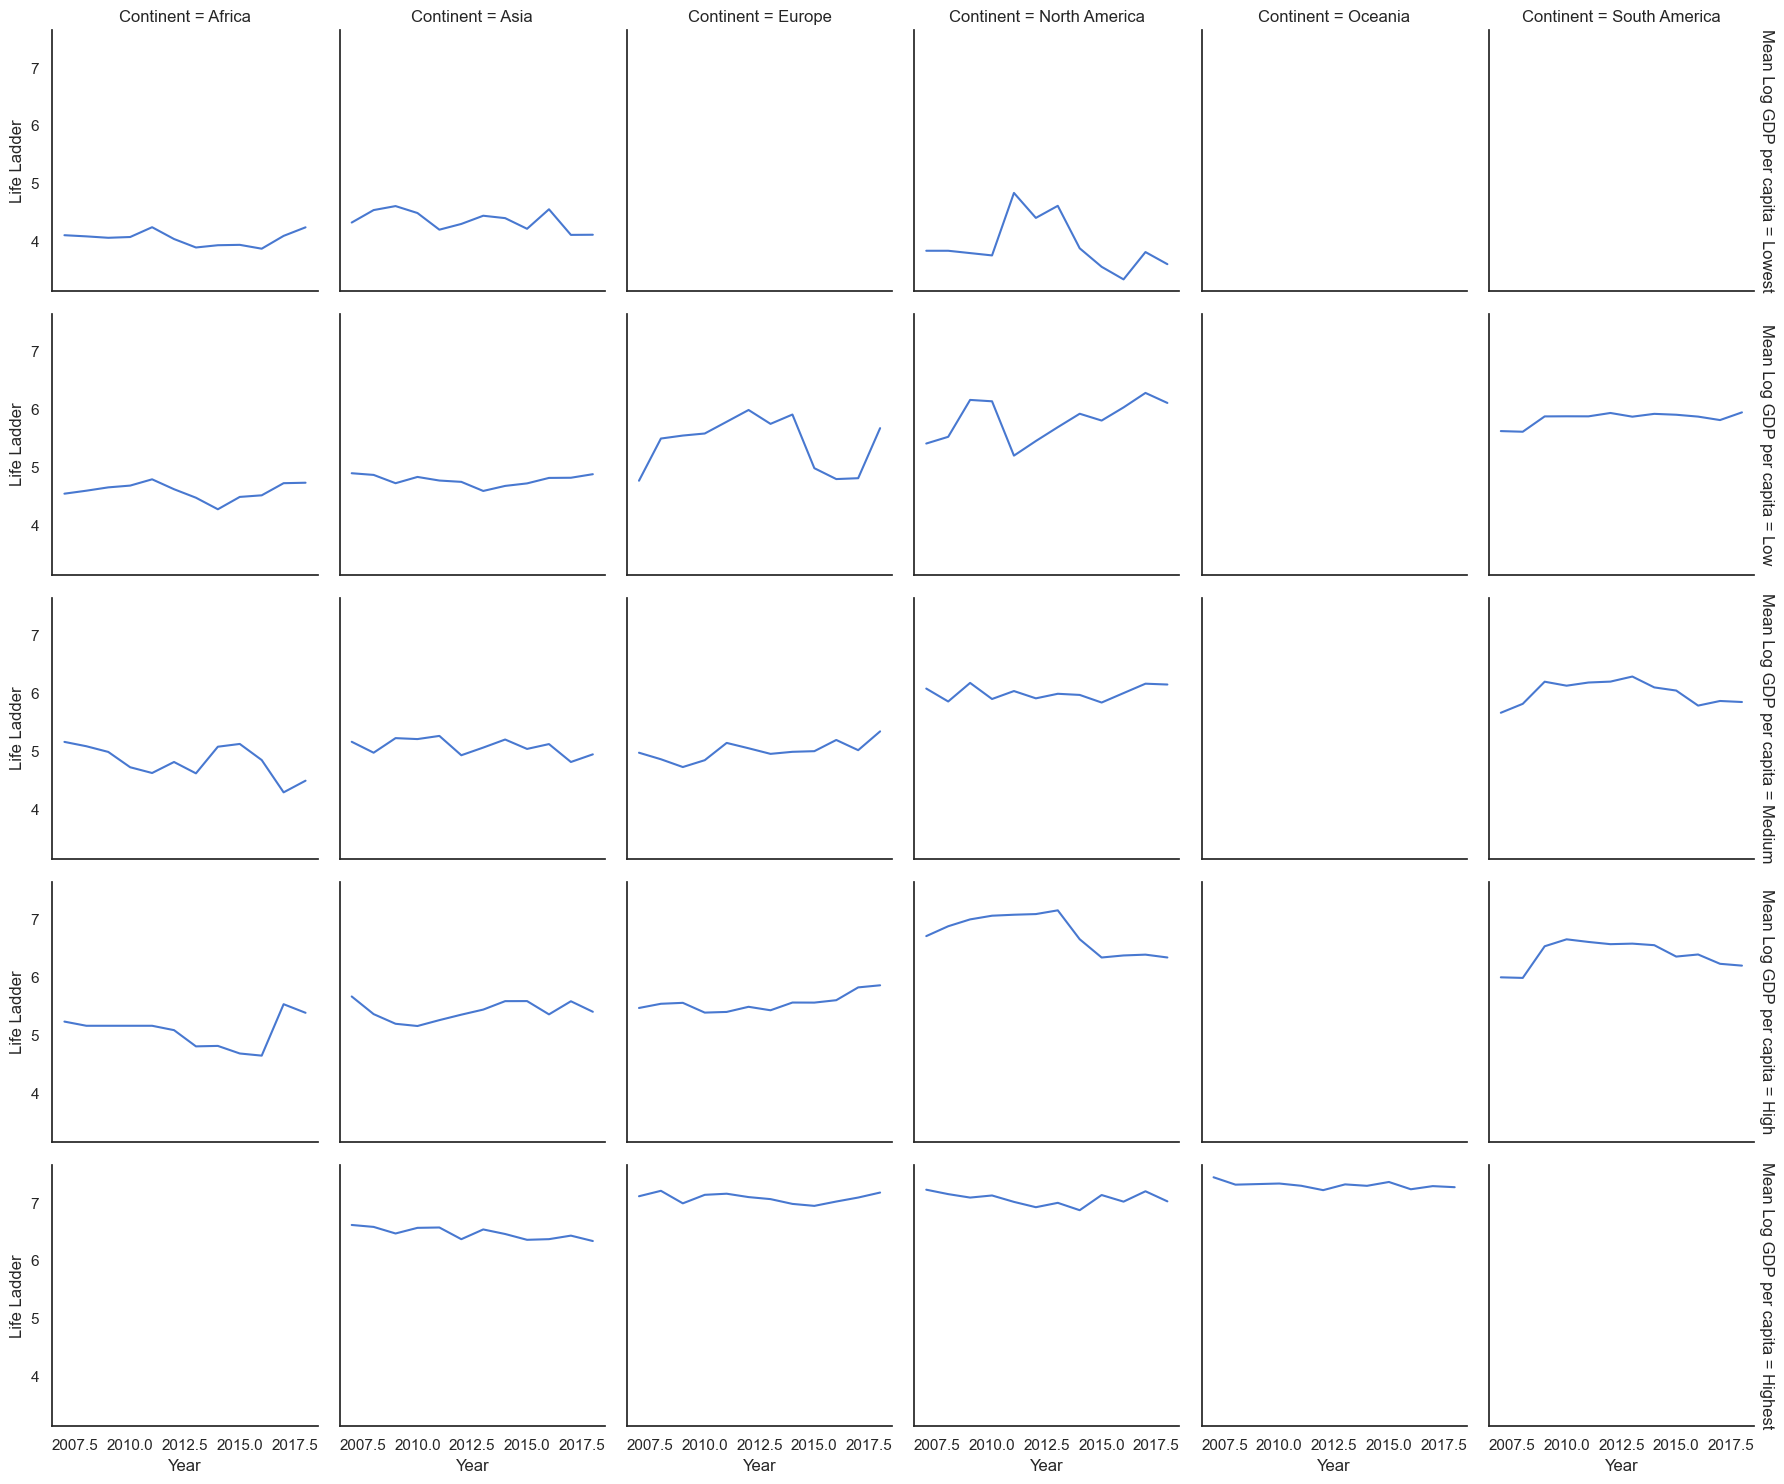

In [19]:
import matplotlib.pyplot as plt     # Fixed error

g = sns.FacetGrid(
    data.groupby(['Mean Log GDP per capita','Year','Continent'])['Life Ladder'].mean().reset_index(),
    row='Mean Log GDP per capita',
    col='Continent',
    margin_titles=True
)
g = (g.map( plt.plot , 'Year','Life Ladder'))

> Life Ladder on the Y-axis, Year on the X-axis. The grid’s columns are the continent, and the grid’s rows are the different levels of Mean Log GDP per capita.

> Overall things seem to be getting better for the countries with a Low Mean Log GDP per Capita in North America and the countries with a Medium or High Mean Log GDP per Capita in Europe

### FacetGrid - Histograms

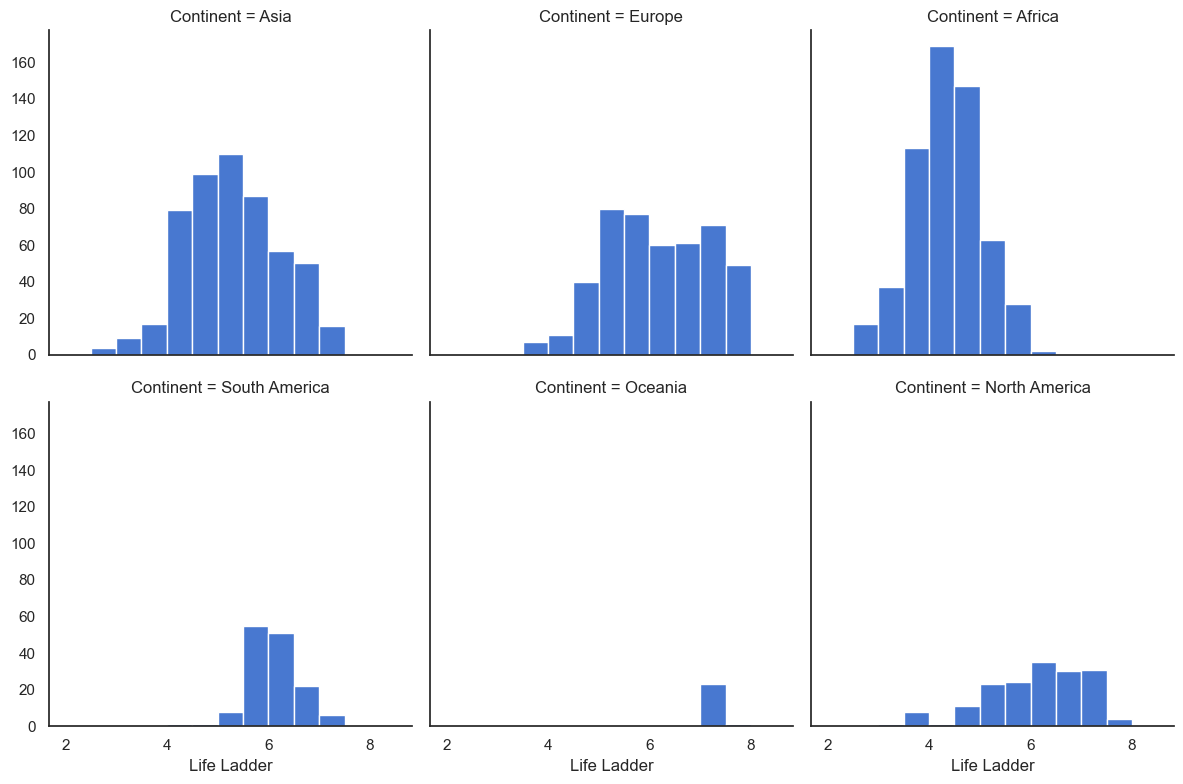

In [20]:
g = sns.FacetGrid(data, col="Continent", col_wrap=3,height=4)
g = (g.map(plt.hist, "Life Ladder",bins=np.arange(2,9,0.5)))

> FacetGrid with a histogram of LifeLadder by continent

### FacetGrid — annotated KDE plots

It is also possible to add facet specific notation to each chart in a grid. In the following example, we add the mean and the standard deviation and a vertical line drawn at the mean (code below).

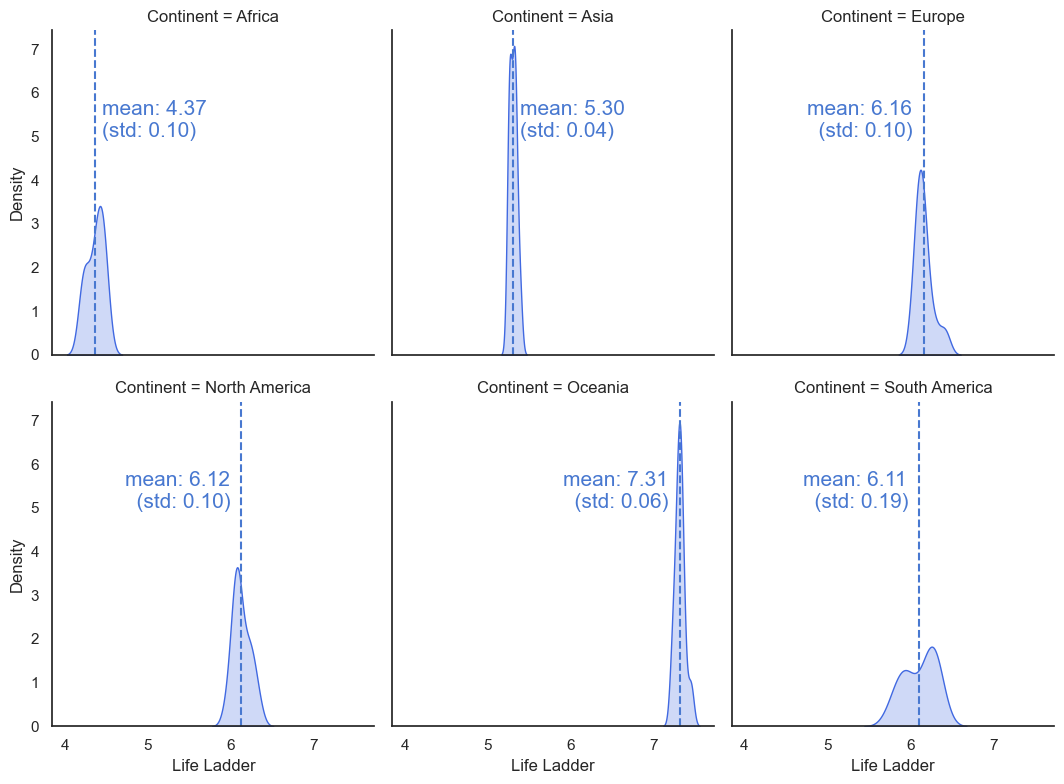

In [21]:
def vertical_mean_line(x, **kwargs):
    plt.axvline(x.mean(), linestyle ="--", 
                color = kwargs.get("color", "r"))
    txkw = dict(size=15, color = kwargs.get("color", "r"))

    label_x_pos_adjustment = 0.08 # this needs customization based on your data
    label_y_pos_adjustment = 5 # this needs customization based on your data
    if x.mean() < 6: # this needs customization based on your data
        tx = "mean: {:.2f}\n(std: {:.2f})".format(x.mean(),x.std())
        plt.text(x.mean() + label_x_pos_adjustment, label_y_pos_adjustment, tx, **txkw)
    else:
        tx = "mean: {:.2f}\n  (std: {:.2f})".format(x.mean(),x.std())
        plt.text(x.mean() -1.4, label_y_pos_adjustment, tx, **txkw)

_ = data.groupby(['Continent','Year'])['Life Ladder'].mean().reset_index()

g = sns.FacetGrid(_, col="Continent", height=4, aspect=0.9, col_wrap=3, margin_titles=True)
g.map(sns.kdeplot, "Life Ladder", shade=True, color='royalblue')
g.map(vertical_mean_line, "Life Ladder")

### FacetGrid — Heatmap Plots

This type of plot is useful to visualize four dimensions and a metric in one single plot.

C:\Users\pjose\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


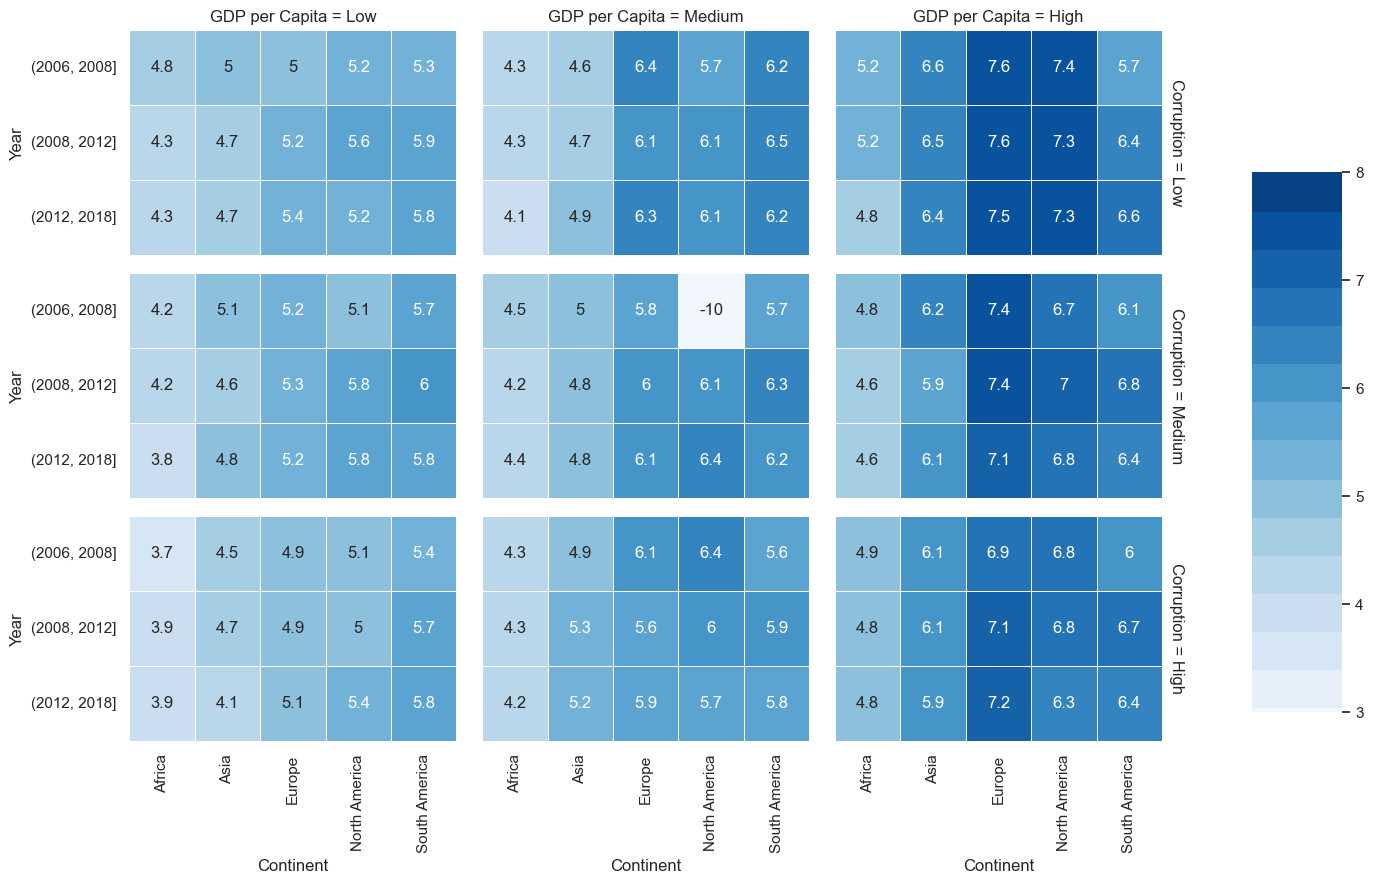

In [22]:
def draw_heatmap(data,inner_row, inner_col, outer_row, outer_col, values, vmin,vmax):
    sns.set(font_scale=1)
    fg = sns.FacetGrid(
        data, 
        row=outer_row,
        col=outer_col, 
        margin_titles=True
    )

    position = left, bottom, width, height = 1.4, .2, .1, .6
    cbar_ax = fg.fig.add_axes(position) 

    fg.map_dataframe(
        draw_heatmap_facet, 
        x_col=inner_col,
        y_col=inner_row, 
        values=values, 
        cbar_ax=cbar_ax,
        vmin=vmin, 
        vmax=vmax
    )

    fg.fig.subplots_adjust(right=1.3)  
    plt.show()

def draw_heatmap_facet(*args, **kwargs):
    data = kwargs.pop('data')
    x_col = kwargs.pop('x_col')
    y_col = kwargs.pop('y_col')
    values = kwargs.pop('values')
    d = data.pivot(index=y_col, columns=x_col, values=values)
    annot = round(d,4).values
    cmap = sns.color_palette("Blues",30) + sns.color_palette("Blues",30)[0::2]
    #cmap = sns.color_palette("Blues",30)
    sns.heatmap(
        d, 
        **kwargs,
        annot=annot, 
        center=0, 
        cmap=cmap, 
        linewidth=.5
    )

# Data preparation
_ = data.copy()
_['Year'] = pd.cut(_['Year'],bins=[2006,2008,2012,2018])

_['GDP per Capita'] = _.groupby(['Continent','Year'])['Log GDP per capita'].transform(
    pd.qcut,
    q=3,
    labels=(['Low','Medium','High'])
).fillna('Low')

_['Corruption'] = _.groupby(['Continent','GDP per Capita'])['Perceptions of corruption'].transform(
    pd.qcut,
    q=3,
    labels=(['Low','Medium','High'])
)

_ = _[_['Continent'] != 'Oceania'].groupby(['Year','Continent','GDP per Capita','Corruption'])['Life Ladder'].mean().reset_index()
_['Life Ladder'] = _['Life Ladder'].fillna(-10)

draw_heatmap(
    data=_,
    outer_row='Corruption',
    outer_col='GDP per Capita',
    inner_row='Year',
    inner_col='Continent',
    values='Life Ladder',
    vmin=3,
    vmax=8,
)

> Facet heatmap, visualizing on the outer rows a year range, outer columns the GDP per Capita, on the inner rows the level of perceived corruption and the inner columns the continents.

> We see that happiness increases towards the top right (i.e., high GDP per Capita and low perceived corruption).

> The effect of time is not definite, and some continents (Europe and North America) seem to be happier than others (Africa).

---
# Plotly

> `import plotly.express as px`

Plotly has `three` vital features:
- `Hovering`: When hovering over a chart, annotations will pop up
- `Interactivity`: Without any additional setup charts can be made interactive (i.e., a journey through time)
- `Beautiful geospatial diagrams`: Plotly has some basic mapping functionality already built-in, but additionally, one can use a mapbox integration for amazing charts.

## Scatter Plot

We call plotly plots by running 

> `fig = x.<PLOT TYPE>(PARAMS)` 

and then 

> `fig.show()` *(For Jupyter environment)*

> `fig.write_html('name.html', auto_open=True)` *(For VSCode environment)*

like this:

In [23]:
fig = px.scatter(
    data_frame=data[data['Year'] == 2018], 
    x="Log GDP per capita", 
    y="Life Ladder", 
    size="Gapminder Population", 
    color="Continent",
    hover_name="Country name",
    size_max=60
)
## fig.show()   -- For Jupyter Environment
fig.write_html('Log_GDP_vs_Life_Ladder.html', auto_open=True)

> Plotly scatter plot, plotting Log GDP per capita against Life Ladder, where color indicates continent and size of the marker the population

### Scatter plot — a stroll through time

In [ ]:
fig = px.scatter(
    data_frame=data, 
    x="Log GDP per capita", 
    y="Life Ladder", 
    animation_frame="Year", 
    animation_group="Country name",
    size="Gapminder Population", 
    color="Continent", 
    hover_name="Country name", 
    facet_col="Continent",
    size_max=45,
    category_orders={'Year':list(range(2007,2019))}     
)
# fig.show()   -- For Jupyter Environment
fig.write_html('Plot_over_time.html', auto_open=True)

> Visualization of how the plotted data changes over the years

### Parallel categories — a fun way to visualize categories

In [ ]:
def q_bin_in_3(col):
    return pd.qcut(
        col,
        q=3,
        labels=['Low','Medium','High']
    )
_ = data.copy()
_['Social support'] = _.groupby('Year')['Social support'].transform(q_bin_in_3)
_['Life Expectancy'] = _.groupby('Year')['Healthy life expectancy at birth'].transform(q_bin_in_3)
_['Generosity'] = _.groupby('Year')['Generosity'].transform(q_bin_in_3)
_['Perceptions of corruption'] = _.groupby('Year')['Perceptions of corruption'].transform(q_bin_in_3)
_ = _.groupby(['Social support','Life Expectancy','Generosity','Perceptions of corruption'])['Life Ladder'].mean().reset_index()
fig = px.parallel_categories(_, color="Life Ladder", color_continuous_scale=px.colors.sequential.Inferno)

# fig.show()   -- For Jupyter Environment
fig.write_html('Parallel_Categories.html', auto_open=True)

> Seems like not all countries with high life expectations are happy!

### Bar plot — an example of interactive filters

In [158]:
import plotly.express as px

data = pd.read_csv('https://raw.githubusercontent.com/FBosler/AdvancedPlotting/master/combined_set.csv')

fig = px.bar(
    data, 
    x="Continent", 
    y="Gapminder Population", 
    color="Log GDP per capita", 
    barmode="stack",
    facet_col="Year",
    category_orders={"Year": range(2007,2019)},
        hover_data=[
        "Log GDP per capita",
        "Gapminder Population",
        "Life Ladder"
    ]
)
fig.write_html('BarPlot.html', auto_open=True)



## Another example of Bar plot
# long_df = px.data.medals_long()   -- medals from countries dataframe

# fig = px.bar(long_df, x="nation", y="count", color="medal", title="Long-Form Input")
# # fig.show()   -- For Jupyter Environment
# fig.write_html('BarPlot.html', auto_open=True)

> Filtering a bar chart is easy. Not surprisingly, South Korea is among the wealthy countries in Asia.

### Choropleth plot — how happiness changes over time

In [159]:
fig = px.choropleth(
    data, 
    locations="ISO3", 
    color="Life Ladder", 
    hover_name="Country name", 
    animation_frame="Year")
# fig.show()   -- For Jupyter Environment
fig.write_html('Choropleth.html', auto_open=True)

>Map visualization of how happiness evolves over the years. Syria and Afghanistan are at the very end of the Life Ladder range (unsurprisingly)

# Addintional Plot Example

In [167]:
fig = px.choropleth(
    data_frame=data, 
    locations="ISO3", 
    color="Perceptions of corruption", 
    hover_name="Country name", 
    animation_frame="Year")

# fig.show()   -- For Jupyter Environment
fig.write_html('Choropleth_2.html', auto_open=True)

> Corruption over time on a time-lapse map